<a href="https://colab.research.google.com/github/viniciusgomesbatista/estudos/blob/main/Desafio_Carpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:

df = pd.read_csv('/content/drive/MyDrive/Arquivos de Trabalho/Carpa/LendingClub_Isbad_Treino.csv')

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,...,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,is_bad
0,643218,800019,20000,20000,60 months,0.0999,424.85,B,B4,Salinas Union High School District,...,NaN,NaN,14,0,INDIVIDUAL,0,0.0,0,0.0,0
1,642872,822773,7475,7475,60 months,0.1372,172.85,C,C5,NaN,...,NaN,NaN,11,0,INDIVIDUAL,0,0.0,0,0.0,0
2,642861,822762,5575,5575,36 months,0.1520,193.81,D,D4,NaN,...,12.0,NaN,14,0,INDIVIDUAL,0,0.0,0,0.0,0
3,642859,822760,2150,2150,60 months,0.1483,50.96,D,D3,Marketing Evolution,...,NaN,NaN,5,0,INDIVIDUAL,0,0.0,0,0.0,0
4,642857,822758,7050,7050,60 months,0.1298,160.34,C,C3,Port of Oakland,...,NaN,NaN,6,0,INDIVIDUAL,0,0.0,0,0.0,0


In [5]:
dicio = pd.read_csv('/content/drive/MyDrive/Arquivos de Trabalho/Carpa/LCDataDictionary.csv', sep=';')

In [6]:
dicio

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
113,verification_status,"Indicates if income was verified by LC, not ve..."
114,verified_status_joint,Indicates if the co-borrowers' joint income wa...
115,zip_code,The first 3 numbers of the zip code provided b...
116,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18061 entries, 0 to 18060
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        18061 non-null  int64  
 1   member_id                 18061 non-null  int64  
 2   loan_amnt                 18061 non-null  int64  
 3   funded_amnt               18061 non-null  int64  
 4   term                      18061 non-null  object 
 5   int_rate                  18061 non-null  float64
 6   installment               18061 non-null  float64
 7   grade                     18061 non-null  object 
 8   sub_grade                 18061 non-null  object 
 9   emp_title                 17031 non-null  object 
 10  emp_length                17743 non-null  object 
 11  home_ownership            18061 non-null  object 
 12  annual_inc                18061 non-null  float64
 13  verification_status       18061 non-null  object 
 14  issue_

In [10]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,is_bad
count,18061.000000,18061.000000,18061.000000,18061.000000,18061.000000,18061.000000,1.806100e+04,18061.000000,18061.000000,18061.000000,6718.000000,1648.000000,18061.000000,18061.000000,18061.0,18005.0,18061.0,17364.000000,18061.000000
mean,492813.599136,611675.219423,10248.384641,9886.998228,0.117923,308.233037,6.840619e+04,12.680751,0.143624,0.921654,34.775975,52.510922,9.179946,0.056586,0.0,0.0,0.0,0.041408,0.131277
std,101347.513500,156440.475067,6381.001132,6077.116546,0.031304,196.487833,7.893806e+04,6.580599,0.468938,1.107763,22.507828,47.395453,4.441843,0.243654,0.0,0.0,0.0,0.200102,0.337713
min,54734.000000,70699.000000,500.000000,500.000000,0.054200,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
25%,437422.000000,521308.000000,5000.000000,5000.000000,0.096200,161.470000,4.000000e+04,7.600000,0.000000,0.000000,17.000000,0.000000,6.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,502770.000000,646254.000000,9000.000000,8500.000000,0.118600,263.290000,5.700000e+04,12.800000,0.000000,1.000000,32.000000,62.000000,8.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
75%,571728.000000,735207.000000,14500.000000,13950.000000,0.139800,407.090000,8.000400e+04,17.890000,0.000000,2.000000,51.000000,99.000000,12.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
max,643218.000000,822773.000000,25000.000000,25000.000000,0.216400,950.120000,6.000000e+06,29.420000,7.000000,8.000000,107.000000,129.000000,44.000000,4.000000,0.0,0.0,0.0,2.000000,1.000000


In [11]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,application_type
count,18061,18061,18061,17031,17743,18061,18061,18061,18061,14088,18061,18049,18061,18061,18061,18061
unique,2,7,35,14081,11,5,3,43,1,13849,14,11633,785,50,484,1
top,36 months,B,A5,US Army,10+ years,RENT,Not Verified,2010-12-01,n,,debt_consolidation,Debt Consolidation,100xx,CA,1999-10-01,INDIVIDUAL
freq,14995,5469,1557,56,3548,8970,9976,1267,18061,207,8003,737,308,3246,181,18061


In [18]:
df_bad = df.groupby('is_bad').size().reset_index(name='count')
df_bad['%'] = df_bad ['count'] / df_bad ['count'].sum() * 100
df_bad

,is_bad,count,%
0,0,15690,86.872266
1,1,2371,13.127734


# 2° pergunta


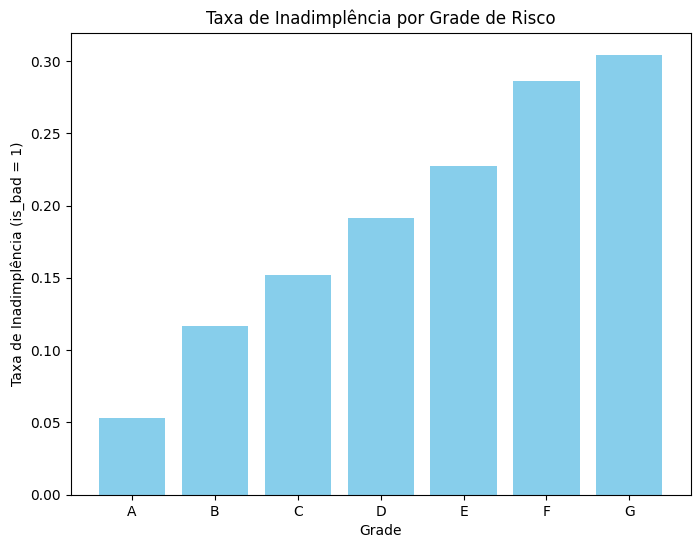

,grade,is_bad
0,A,0.053106
1,B,0.117023
2,C,0.151835
3,D,0.191531
4,E,0.227191
5,F,0.286145
6,G,0.304348


In [36]:
# Cálculo da taxa de inadimplência por grade
risk_by_grade = df.groupby('grade')['is_bad'].mean().reset_index()

# Plotando o gráfico
plt.figure(figsize=(8, 6))
plt.bar(risk_by_grade['grade'], risk_by_grade['is_bad'], color='skyblue')
plt.xlabel('Grade')
plt.ylabel('Taxa de Inadimplência (is_bad = 1)')
plt.title('Taxa de Inadimplência por Grade de Risco')
plt.show()

# Exibindo a tabela de taxas
risk_by_grade

# 3° pergunta

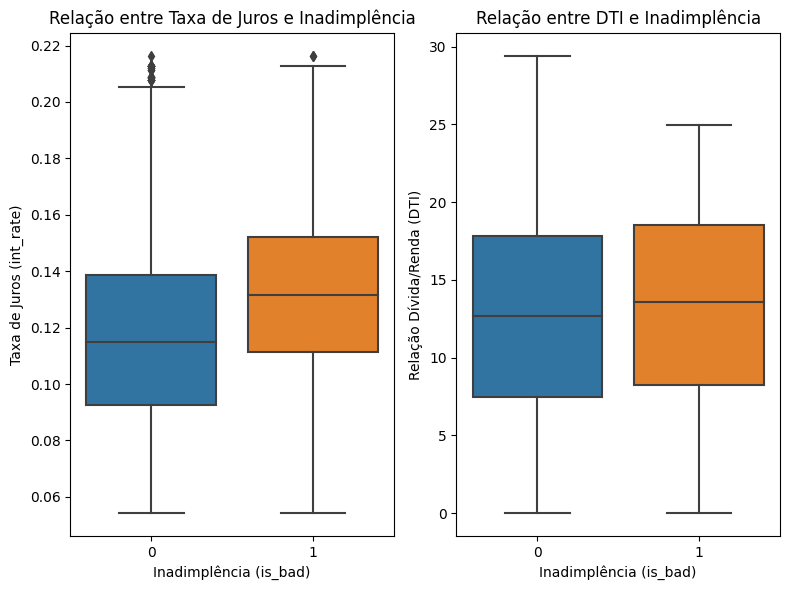

In [37]:
# Plotando a relação entre int_rate e is_bad
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='is_bad', y='int_rate', data=df)
plt.title('Relação entre Taxa de Juros e Inadimplência')
plt.xlabel('Inadimplência (is_bad)')
plt.ylabel('Taxa de Juros (int_rate)')

# Plotando a relação entre dti e is_bad
plt.subplot(1, 2, 2)
sns.boxplot(x='is_bad', y='dti', data=df)
plt.title('Relação entre DTI e Inadimplência')
plt.xlabel('Inadimplência (is_bad)')
plt.ylabel('Relação Dívida/Renda (DTI)')

plt.tight_layout()
plt.show()

# Selecionar apenas colunas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

In [41]:
# Calcular a matriz de correlação
correlation_matrix = round(numeric_df.corr(),3).sort_values('is_bad')
correlation_matrix

,id,member_id,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,is_bad
annual_inc,0.009,0.011,0.215,0.209,0.020,0.203,1.000,-0.111,0.019,0.029,-0.004,-0.016,0.129,-0.009,NaN,NaN,NaN,-0.006,-0.026
id,1.000,0.985,0.066,0.045,-0.001,-0.043,0.009,0.062,-0.013,-0.046,0.250,0.783,-0.019,-0.011,NaN,NaN,NaN,-0.025,-0.014
member_id,0.985,1.000,0.071,0.051,-0.001,-0.036,0.011,0.059,-0.013,-0.053,0.237,0.773,-0.022,-0.012,NaN,NaN,NaN,-0.023,-0.014
open_acc,-0.019,-0.022,0.193,0.190,-0.033,0.183,0.129,0.274,0.018,0.089,0.029,-0.012,1.000,-0.014,NaN,NaN,NaN,0.001,-0.010
delinq_2yrs,-0.013,-0.013,-0.026,-0.024,0.156,-0.009,0.019,-0.035,1.000,0.001,-0.521,-0.051,0.018,0.003,NaN,NaN,NaN,0.002,0.008
mths_since_last_delinq,0.250,0.237,-0.001,-0.003,-0.005,-0.018,-0.004,0.087,-0.521,-0.000,1.000,0.484,0.029,0.066,NaN,NaN,NaN,0.013,0.010
installment,-0.043,-0.036,0.922,0.966,0.241,1.000,0.203,0.065,-0.009,0.001,-0.018,-0.082,0.183,-0.040,NaN,NaN,NaN,-0.018,0.018
funded_amnt,0.045,0.051,0.970,1.000,0.230,0.966,0.209,0.071,-0.024,0.003,-0.003,-0.055,0.190,-0.047,NaN,NaN,NaN,-0.023,0.028
loan_amnt,0.066,0.071,1.000,0.970,0.205,0.922,0.215,0.073,-0.026,0.001,-0.001,-0.040,0.193,-0.049,NaN,NaN,NaN,-0.025,0.030
dti,0.062,0.059,0.073,0.071,0.136,0.065,-0.111,1.000,-0.035,-0.011,0.087,0.176,0.274,0.001,NaN,NaN,NaN,0.016,0.032


# Pergunta 5

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [43]:
# Aplicando Label Encoding para as variáveis categóricas
label_encoder = LabelEncoder()

df_model = df[['grade','sub_grade','int_rate','annual_inc','dti','is_bad']]

df_model['grade'] = label_encoder.fit_transform(df_model['grade'])
df_model['sub_grade'] = label_encoder.fit_transform(df_model['sub_grade'])

# Dividindo os dados em treino e teste
X = df_model.drop('is_bad', axis=1)
y = df_model['is_bad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo com apenas 'grade' e 'sub_grade'
X_train_simple = X_train[['grade', 'sub_grade']]
X_test_simple = X_test[['grade', 'sub_grade']]
model_simple = RandomForestClassifier(random_state=42)
model_simple.fit(X_train_simple, y_train)
y_pred_simple = model_simple.predict_proba(X_test_simple)[:, 1]
auc_simple = roc_auc_score(y_test, y_pred_simple)

# Modelo com todas as variáveis
model_full = RandomForestClassifier(random_state=42)
model_full.fit(X_train, y_train)
y_pred_full = model_full.predict_proba(X_test)[:, 1]
auc_full = roc_auc_score(y_test, y_pred_full)

auc_simple, auc_full

<ipython-input-43-2b615333ab9e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['grade'] = label_encoder.fit_transform(df_model['grade'])
<ipython-input-43-2b615333ab9e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['sub_grade'] = label_encoder.fit_transform(df_model['sub_grade'])


(0.6455176600308493, 0.5818044743565025)

Modelo Simples (grade e sub_grade): A AUC-ROC é de aproximadamente 0.646, o que indica que esse modelo tem uma capacidade preditiva razoável, mas longe de ser excelente.

Modelo Completo (todas as variáveis): A AUC-ROC é de aproximadamente 0.582, o que é um pouco inferior ao modelo simples, sugerindo que, ao incluir todas as variáveis, o modelo não melhorou a capacidade preditiva e, na verdade, pode ter introduzido mais ruído.